In [8]:
import numpy as np
from qiskit.pulse import Schedule, Play, DriveChannel, SamplePulse, ConstantPulse, Delay
from qiskit.pulse import InstructionScheduleMap
from qiskit.test.mock import FakeAlmaden
from qiskit import IBMQ, execute
from qiskit import QuantumCircuit
from qiskit import transpile, schedule as build_schedule

In [ ]:
inst_map = backend.defaults().instruction_schedule_map

schedule.draw(plot_range=[0, 1700])

backend = FakeAlmaden()

transpiled_circ = transpile(circ, backend) 
schedule = build_schedule(transpiled_circ, backend)

circ = QuantumCircuit(1, 1)
circ = QuantumCircuit(2, 2)
circ.h(0)
circ.cx(0, 1)
circ.measure([0, 1], [0, 1])

circ.draw()
backend = IBMQ.load_account().get_backend(open_pulse=True)
job = execute(sched, backend)

result = job.result()

In [6]:
# connect to armonk QPU
provider = IBMQ.load_account()
backend = provider.get_backend('ibmq_armonk')

# obtain default gates on each qubit
inst_map = backend.defaults().instruction_schedule_map
print(inst_map)

ibmqfactory.load_account:WARNING:2020-05-02 00:42:03,278: Credentials are already in use. The existing account in the session will be replaced.


<InstructionScheduleMap(1Q instructions:
  q0: {'u2', 'x', 'id', 'u1', 'measure', 'u3'}
Multi qubit instructions:
)>


In [33]:
backend.properties()
backend_config = backend.configuration()
assert backend_config.open_pulse, "Backend doesn't support Pulse"
dt = backend_config.dt
print(f"Sampling time: {dt*1e9} ns") 

backend_defaults = backend.defaults()

Sampling time: 0.2222222222222222 ns


In [23]:
job_limit = backend.job_limit()
print(job_limit)

BackendJobLimit(active_jobs=0, maximum_jobs=5)


In [42]:
# build a circuit to get pulse schedule with X gate
pi = np.pi
circ = QuantumCircuit(1, 1)
circ.id(0)
#circ.measure(0, 0)
transpiled_circ = transpile(circ, backend)
schedule = build_schedule(transpiled_circ, backend)

transpiled_circ.draw()

┌───┐
q_0: ┤ I ├
     └───┘
c_0: ═════

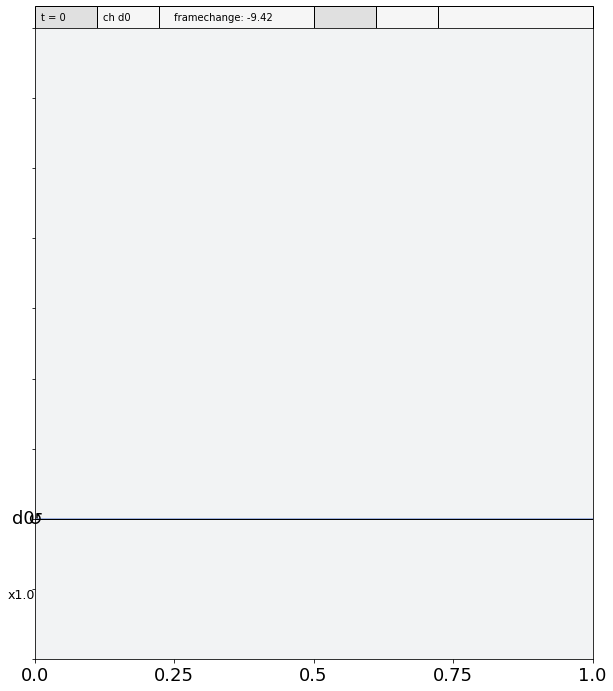

In [35]:
schedule.draw()

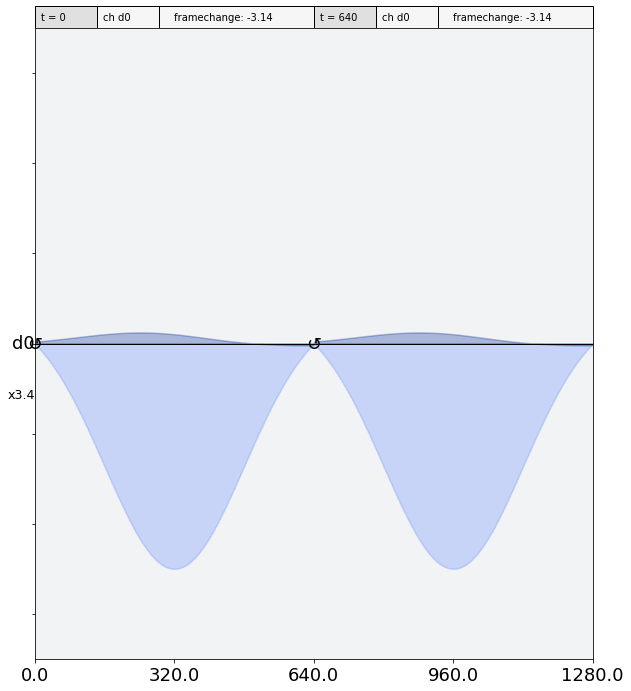

In [79]:
schedule.draw()

In [80]:
# schedule properties
schedule.duration

1280

In [88]:
sched = Schedule(name='getting_started')
sched.insert()

((0, ShiftPhase(-3.141592653589793, DriveChannel(0))),
 (0,
  Play(SamplePulse(array([0.00047726-2.48229946e-03j, 0.00106022-2.52937642e-03j,
         0.00164864-2.57677119e-03j, 0.00224254-2.62448378e-03j,
         0.00284193-2.67251232e-03j, 0.00344684-2.72085704e-03j,
         0.00405728-2.76951655e-03j, 0.00467329-2.81849038e-03j,
         0.00529487-2.86777737e-03j, 0.00592206-2.91737681e-03j,
         0.00655486-2.96728732e-03j, 0.00719329-3.01750842e-03j,
         0.00783738-3.06803826e-03j, 0.00848715-3.11887637e-03j,
         0.0091426 -3.17002111e-03j, 0.00980376-3.22147110e-03j,
         0.01047065-3.27322539e-03j, 0.01114327-3.32528213e-03j,
         0.01182165-3.37764015e-03j, 0.01250579-3.43029806e-03j,
         0.01319572-3.48325423e-03j, 0.01389145-3.53650702e-03j,
         0.01459299-3.59005434e-03j, 0.01530036-3.64389527e-03j,
         0.01601356-3.69802769e-03j, 0.01673262-3.75244953e-03j,
         0.01745753-3.80715914e-03j, 0.01818831-3.86215444e-03j,
         0.01

## Finding the Qubit Frequency 

In [34]:
import numpy as np

# unit conversion factors -> all backend properties returned in SI (Hz, sec, etc)
GHz = 1.0e9 # Gigahertz
MHz = 1.0e6 # Megahertz
us = 1.0e-6 # Microseconds
ns = 1.0e-9 # Nanoseconds

# We will find the qubit frequency for the following qubit.
qubit = 0

# The sweep will be centered around the estimated qubit frequency.
center_frequency_Hz = backend_defaults.qubit_freq_est[qubit]        # The default frequency is given in Hz
                                                                    # warning: this will change in a future release
print(f"Qubit {qubit} has an estimated frequency of {center_frequency_Hz / GHz} GHz.")

# scale factor to remove factors of 10 from the data
scale_factor = 1e-14

# We will sweep 40 MHz around the estimated frequency
frequency_span_Hz = 40 * MHz
# in steps of 1 MHz.
frequency_step_Hz = 1 * MHz

# We will sweep 20 MHz above and 20 MHz below the estimated frequency
frequency_min = center_frequency_Hz - frequency_span_Hz / 2
frequency_max = center_frequency_Hz + frequency_span_Hz / 2
# Construct an np array of the frequencies for our experiment
frequencies_GHz = np.arange(frequency_min / GHz, 
                            frequency_max / GHz, 
                            frequency_step_Hz / GHz)

print(f"The sweep will go from {frequency_min / GHz} GHz to {frequency_max / GHz} GHz \
in steps of {frequency_step_Hz / MHz} MHz.")

Qubit 0 has an estimated frequency of 4.974294751336446 GHz.
The sweep will go from 4.9542947513364455 GHz to 4.9942947513364455 GHz in steps of 1.0 MHz.


In [35]:
# samples need to be multiples of 16
def get_closest_multiple_of_16(num):
    return int(num + 8 ) - (int(num + 8 ) % 16)

In [36]:
from qiskit import pulse            # This is where we access all of our Pulse features!
from qiskit.pulse import pulse_lib  # This Pulse module helps us build sampled pulses for common pulse shapes


# Drive pulse parameters (us = microseconds)
drive_sigma_us = 0.075                     # This determines the actual width of the gaussian
drive_samples_us = drive_sigma_us*8        # This is a truncating parameter, because gaussians don't have 
                                           # a natural finite length

drive_sigma = get_closest_multiple_of_16(drive_sigma_us * us /dt)       # The width of the gaussian in units of dt
drive_samples = get_closest_multiple_of_16(drive_samples_us * us /dt)   # The truncating parameter in units of dt
drive_amp = 0.3
# Drive pulse samples
drive_pulse = pulse_lib.gaussian(duration=drive_samples,
                                 sigma=drive_sigma,
                                 amp=drive_amp,
                                 name='freq_sweep_excitation_pulse')

In [37]:
# Find out which group of qubits need to be acquired with this qubit
meas_map_idx = None
for i, measure_group in enumerate(backend_config.meas_map):
    if qubit in measure_group:
        meas_map_idx = i
        break
assert meas_map_idx is not None, f"Couldn't find qubit {qubit} in the meas_map!"

In [38]:
inst_sched_map = backend_defaults.instruction_schedule_map
measure = inst_sched_map.get('measure', qubits=backend_config.meas_map[meas_map_idx])

In [39]:
### Collect the necessary channels
drive_chan = pulse.DriveChannel(qubit)
meas_chan = pulse.MeasureChannel(qubit)
acq_chan = pulse.AcquireChannel(qubit)

In [40]:
# Create the base schedule
# Start with drive pulse acting on the drive channel
schedule = pulse.Schedule(name='Frequency sweep')
schedule += drive_pulse(drive_chan)
# The left shift `<<` is special syntax meaning to shift the start time of the schedule by some duration
schedule += measure << schedule.duration

# Create the frequency settings for the sweep (MUST BE IN HZ)
frequencies_Hz = frequencies_GHz*GHz
schedule_frequencies = [{drive_chan: freq} for freq in frequencies_Hz]

/Users/worknic/opt/anaconda3/envs/test/lib/python3.8/site-packages/qiskit/pulse/pulse_lib/sample_pulse.py:148: DeprecationWarning: Calling `SamplePulse` with a channel is deprecated. Instantiate the new `Play` instruction directly with a pulse and a channel. In this case, please use: `Play(SamplePulse(samples), DriveChannel(0))`.
  warnings.warn("Calling `{}` with a channel is deprecated. Instantiate the new `Play` "


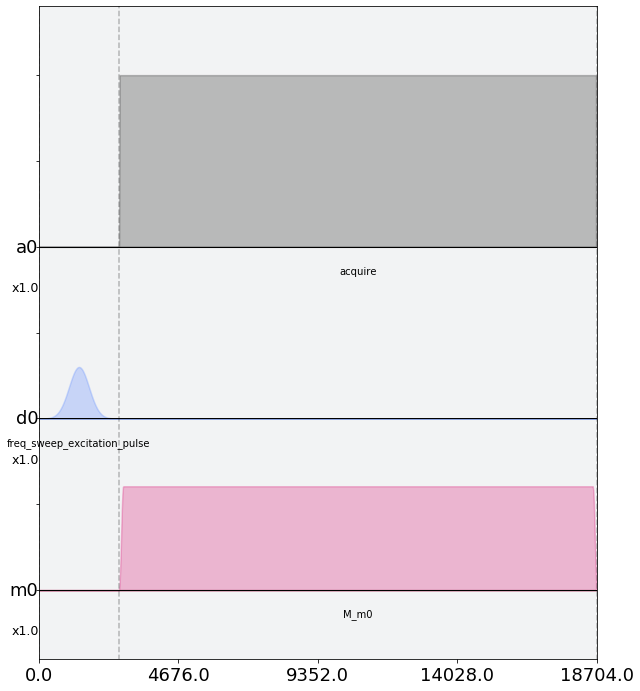

In [41]:
schedule.draw(channels=[drive_chan, meas_chan, acq_chan], label=True, scaling=1.0)

In [42]:
from qiskit import assemble

num_shots_per_frequency = 1024
frequency_sweep_program = assemble(schedule,
                                   backend=backend, 
                                   meas_level=1,
                                   meas_return='avg',
                                   shots=num_shots_per_frequency,
                                   schedule_los=schedule_frequencies)

In [43]:
job = backend.run(frequency_sweep_program)

In [44]:
print(job.job_id())
from qiskit.tools.monitor import job_monitor
job_monitor(job)

5eac617e2451380011934737
Job Status: job has successfully run


In [45]:
frequency_sweep_results = job.result(timeout=120) # timeout parameter set to 120 seconds

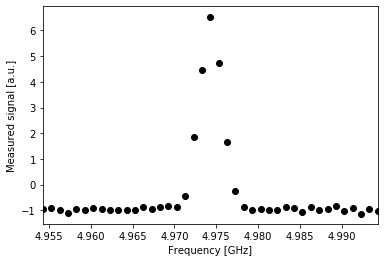

In [46]:
%matplotlib inline
import matplotlib.pyplot as plt

sweep_values = []
for i in range(len(frequency_sweep_results.results)):
    # Get the results from the ith experiment
    res = frequency_sweep_results.get_memory(i)*scale_factor
    # Get the results for `qubit` from this experiment
    sweep_values.append(res[qubit])

plt.scatter(frequencies_GHz, np.real(sweep_values), color='black') # plot real part of sweep values
plt.xlim([min(frequencies_GHz), max(frequencies_GHz)])
plt.xlabel("Frequency [GHz]")
plt.ylabel("Measured signal [a.u.]")
plt.show()

In [47]:
from scipy.optimize import curve_fit

def fit_function(x_values, y_values, function, init_params):
    fitparams, conv = curve_fit(function, x_values, y_values, init_params)
    y_fit = function(x_values, *fitparams)
    
    return fitparams, y_fit

In [53]:
fit_params, y_fit = fit_function(frequencies_GHz,
                                 np.real(sweep_values), 
                                 lambda x, A, q_freq, B, C: (A / np.pi) * (B / ((x - q_freq)**2 + B**2)) + C,
                                 [5, 4.975, 1, 2] # initial parameters for curve_fit
                                )

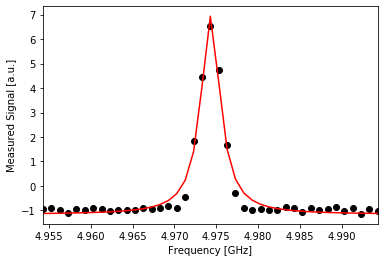

In [54]:
plt.scatter(frequencies_GHz, np.real(sweep_values), color='black')
plt.plot(frequencies_GHz, y_fit, color='red')
plt.xlim([min(frequencies_GHz), max(frequencies_GHz)])

plt.xlabel("Frequency [GHz]")
plt.ylabel("Measured Signal [a.u.]")
plt.show()

In [55]:
A, rough_qubit_frequency, B, C = fit_params
rough_qubit_frequency = rough_qubit_frequency*GHz # make sure qubit freq is in Hz
print(f"We've updated our qubit frequency estimate from "
      f"{round(backend_defaults.qubit_freq_est[qubit] / GHz, 5)} GHz to {round(rough_qubit_frequency/GHz, 5)} GHz.")

We've updated our qubit frequency estimate from 4.97429 GHz to 4.97432 GHz.


## Calibrating a $\pi$ Pulse

In [56]:
# This experiment uses these values from the previous experiment:
    # `qubit`,
    # `measure`, and
    # `rough_qubit_frequency`.

# Rabi experiment parameters
num_rabi_points = 50

# Drive amplitude values to iterate over: 50 amplitudes evenly spaced from 0 to 0.75
drive_amp_min = 0
drive_amp_max = 0.75
drive_amps = np.linspace(drive_amp_min, drive_amp_max, num_rabi_points)

In [57]:
# Build the Rabi experiments:
#    A drive pulse at the qubit frequency, followed by a measurement,
#    where we vary the drive amplitude each time.
rabi_schedules = []
for drive_amp in drive_amps:
    rabi_pulse = pulse_lib.gaussian(duration=drive_samples, amp=drive_amp, 
                                    sigma=drive_sigma, name=f"Rabi drive amplitude = {drive_amp}")
    this_schedule = pulse.Schedule(name=f"Rabi drive amplitude = {drive_amp}")
    this_schedule += rabi_pulse(drive_chan)
    # Reuse the measure instruction from the frequency sweep experiment
    this_schedule += measure << this_schedule.duration
    rabi_schedules.append(this_schedule)

/Users/worknic/opt/anaconda3/envs/test/lib/python3.8/site-packages/qiskit/pulse/pulse_lib/sample_pulse.py:148: DeprecationWarning: Calling `SamplePulse` with a channel is deprecated. Instantiate the new `Play` instruction directly with a pulse and a channel. In this case, please use: `Play(SamplePulse(samples), DriveChannel(0))`.
  warnings.warn("Calling `{}` with a channel is deprecated. Instantiate the new `Play` "
/Users/worknic/opt/anaconda3/envs/test/lib/python3.8/site-packages/qiskit/pulse/pulse_lib/sample_pulse.py:148: DeprecationWarning: Calling `SamplePulse` with a channel is deprecated. Instantiate the new `Play` instruction directly with a pulse and a channel. In this case, please use: `Play(SamplePulse(samples), DriveChannel(0))`.
  warnings.warn("Calling `{}` with a channel is deprecated. Instantiate the new `Play` "
/Users/worknic/opt/anaconda3/envs/test/lib/python3.8/site-packages/qiskit/pulse/pulse_lib/sample_pulse.py:148: DeprecationWarning: Calling `SamplePulse` with 

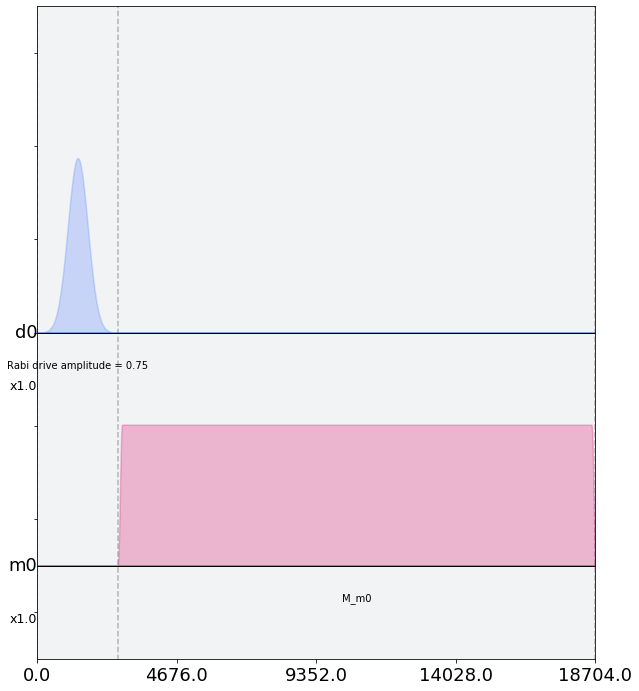

In [58]:
rabi_schedules[-1].draw(channels=[drive_chan, meas_chan], label=True, scaling=1.0)

In [59]:
# Assemble the schedules into a Qobj
num_shots_per_point = 1024

rabi_experiment_program = assemble(rabi_schedules,
                                   backend=backend,
                                   meas_level=1,
                                   meas_return='avg',
                                   shots=num_shots_per_point,
                                   schedule_los=[{drive_chan: rough_qubit_frequency}]
                                                * num_rabi_points)

In [60]:
print(job.job_id())
job = backend.run(rabi_experiment_program)
job_monitor(job)

Job Status: job has successfully run


In [61]:
rabi_results = job.result(timeout=120)

In [62]:
# center data around 0
def baseline_remove(values):
    return np.array(values) - np.mean(values)

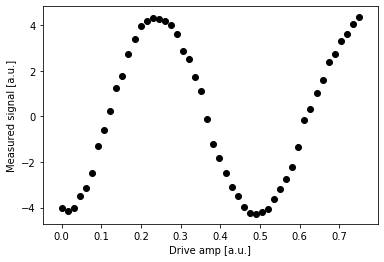

In [63]:
rabi_values = []
for i in range(num_rabi_points):
    # Get the results for `qubit` from the ith experiment
    rabi_values.append(rabi_results.get_memory(i)[qubit]*scale_factor)

rabi_values = np.real(baseline_remove(rabi_values))

plt.xlabel("Drive amp [a.u.]")
plt.ylabel("Measured signal [a.u.]")
plt.scatter(drive_amps, rabi_values, color='black') # plot real part of Rabi values
plt.show()

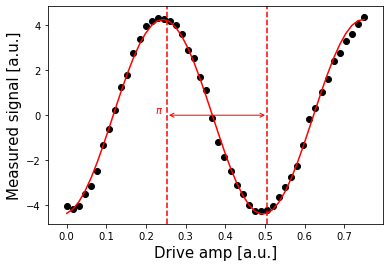

In [64]:
fit_params, y_fit = fit_function(drive_amps,
                                 rabi_values, 
                                 lambda x, A, B, drive_period, phi: (A*np.cos(2*np.pi*x/drive_period - phi) + B),
                                 [3, 0.1, 0.5, 0])

plt.scatter(drive_amps, rabi_values, color='black')
plt.plot(drive_amps, y_fit, color='red')

drive_period = fit_params[2] # get period of rabi oscillation

plt.axvline(drive_period/2, color='red', linestyle='--')
plt.axvline(drive_period, color='red', linestyle='--')
plt.annotate("", xy=(drive_period, 0), xytext=(drive_period/2,0), arrowprops=dict(arrowstyle="<->", color='red'))
plt.annotate("$\pi$", xy=(drive_period/2-0.03, 0.1), color='red')

plt.xlabel("Drive amp [a.u.]", fontsize=15)
plt.ylabel("Measured signal [a.u.]", fontsize=15)
plt.show()

In [65]:
pi_amp = abs(drive_period / 2)
print(f"Pi Amplitude = {pi_amp}")

Pi Amplitude = 0.25273063167681853


In [66]:
pi_pulse = pulse_lib.gaussian(duration=drive_samples,
                              amp=pi_amp, 
                              sigma=drive_sigma,
                              name='pi_pulse')

In [81]:
drive_samples

2704

In [84]:
# Create two schedules

# Ground state schedule
gnd_schedule = pulse.Schedule(name="ground state")
gnd_schedule += measure

# Excited state schedule
exc_schedule = pulse.Schedule(name="excited state")
exc_schedule += pi_pulse(drive_chan)  # We found this in Part 2A above
exc_schedule += measure << exc_schedule.duration

/Users/worknic/opt/anaconda3/envs/test/lib/python3.8/site-packages/qiskit/pulse/pulse_lib/sample_pulse.py:148: DeprecationWarning: Calling `SamplePulse` with a channel is deprecated. Instantiate the new `Play` instruction directly with a pulse and a channel. In this case, please use: `Play(SamplePulse(samples), DriveChannel(0))`.
  warnings.warn("Calling `{}` with a channel is deprecated. Instantiate the new `Play` "


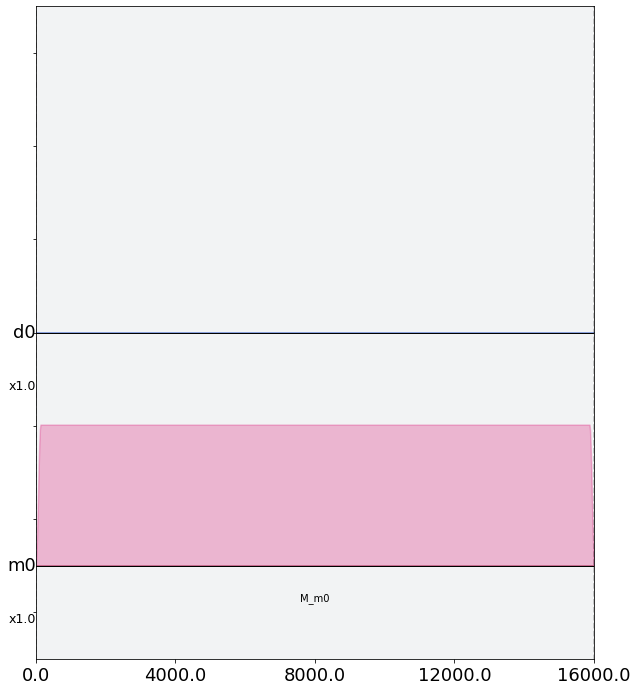

In [85]:
gnd_schedule.draw(channels=[drive_chan, meas_chan], label=True, scaling=1.0)

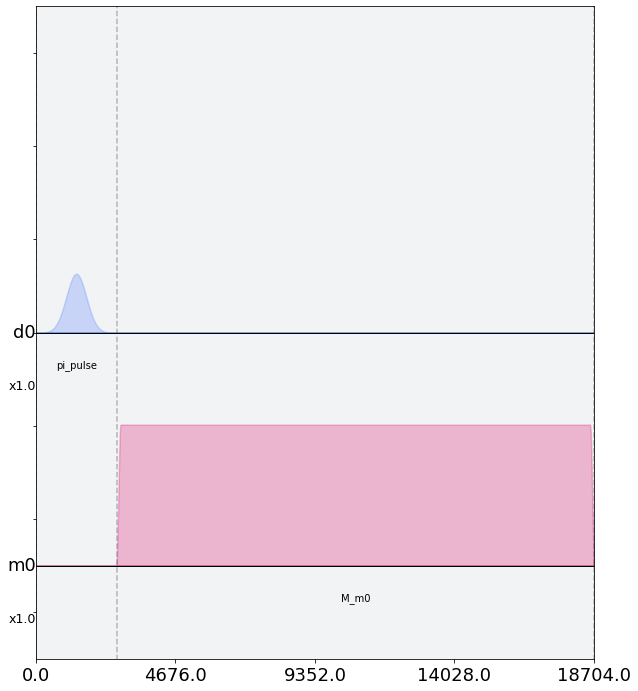

In [86]:
exc_schedule.draw(channels=[drive_chan, meas_chan], label=True, scaling=1.0)

In [70]:
# Execution settings
num_shots = 1024

gnd_exc_program = assemble([gnd_schedule, exc_schedule],
                           backend=backend,
                           meas_level=1,
                           meas_return='single',
                           shots=num_shots,
                           schedule_los=[{drive_chan: rough_qubit_frequency}] * 2)

In [71]:
print(job.job_id())
job = backend.run(gnd_exc_program)
job_monitor(job)

5eac6389a2eb99001220d2d5
Job Status: job has successfully run


In [72]:
gnd_exc_results = job.result(timeout=120)

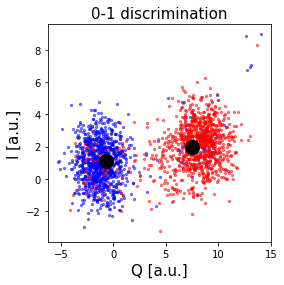

In [73]:
gnd_results = gnd_exc_results.get_memory(0)[:, qubit]*scale_factor
exc_results = gnd_exc_results.get_memory(1)[:, qubit]*scale_factor

plt.figure(figsize=[4,4])
# Plot all the results
# All results from the gnd_schedule are plotted in blue
plt.scatter(np.real(gnd_results), np.imag(gnd_results), 
                s=5, cmap='viridis', c='blue', alpha=0.5, label='state_0')
# All results from the exc_schedule are plotted in red
plt.scatter(np.real(exc_results), np.imag(exc_results), 
                s=5, cmap='viridis', c='red', alpha=0.5, label='state_1')

# Plot a large dot for the average result of the 0 and 1 states.
mean_gnd = np.mean(gnd_results) # takes mean of both real and imaginary parts
mean_exc = np.mean(exc_results)
plt.scatter(np.real(mean_gnd), np.imag(mean_gnd), 
            s=200, cmap='viridis', c='black',alpha=1.0, label='state_0_mean')
plt.scatter(np.real(mean_exc), np.imag(mean_exc), 
            s=200, cmap='viridis', c='black',alpha=1.0, label='state_1_mean')

plt.ylabel('I [a.u.]', fontsize=15)
plt.xlabel('Q [a.u.]', fontsize=15)
plt.title("0-1 discrimination", fontsize=15)

plt.show()

In [74]:
import math

def classify(point: complex):
    """Classify the given state as |0> or |1>."""
    def distance(a, b):
        return math.sqrt((np.real(a) - np.real(b))**2 + (np.imag(a) - np.imag(b))**2)
    return int(distance(point, mean_exc) < distance(point, mean_gnd))